In [4]:
from sklearn.datasets import fetch_20newsgroups

/Users/apple/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
master_train=fetch_20newsgroups(subset='train',shuffle=1)
master_test=fetch_20newsgroups(subset='test',shuffle=1)

In [6]:
import pandas as pd
import numpy as np

/Users/apple/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
train=[]
print("\n".join(master_train.data[2230].split('\n')))

From: king@ctron.com (John E. King)
Subject: Re: After 2000 years, can we say that Christian Morality is oxymoronic?
Organization: Cabletron Systems Inc.
Lines: 16
NNTP-Posting-Host: saturn.ctron.com
To: "Andrew A. Houghton" <ah0i+@andrew.cmu.edu>



Andrew A. Houghton"  writes:  

>I'm still waiting to hear a good response from a christian type..  how
>is christ's word (as quoted by Paul) reconciled with current christian
>beliefs?

Almost one third of the world's population claim to be Christian.  But
any similarity between their beliefs and lifestyle to the first century
model is purely coincidental.  At Luke 18:8 it states, "...nevertheless,
when the son of man returns, will he really find the faith on the earth?"


Jack




In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf=TfidfVectorizer()

In [11]:
tfidf.fit(master_train.data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [12]:
len(tfidf.vocabulary_.keys())

130107

In [13]:
x_train=tfidf.transform(master_train.data)
x_train

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [14]:
x_test=tfidf.transform(master_test.data)
x_test

<7532x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1107956 stored elements in Compressed Sparse Row format>

In [20]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()
encoder.fit(master_train.target)
encoded_train_y = encoder.transform(master_train.target)
encoded_test_y = encoder.transform(master_test.target)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_train_y = np_utils.to_categorical(encoded_train_y)
dummy_test_y = np_utils.to_categorical(encoded_test_y)

In [30]:
import keras
from keras.models import Sequential
from keras import layers
import tensorflow as tf
tf.config.run_functions_eagerly

<function tensorflow.python.eager.def_function.run_functions_eagerly(run_eagerly)>

In [18]:
kmodel=Sequential()
kmodel.add(layers.Dense(30,input_dim=len(tfidf.vocabulary_.keys()),activation='relu'))
kmodel.add(layers.Dense(20,activation='softmax'))

In [19]:
kmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
kmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                3903240   
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
Total params: 3,903,860
Trainable params: 3,903,860
Non-trainable params: 0
_________________________________________________________________


In [22]:
import scipy as scipy
x_train.sort_indices()
x_test.sort_indices()

In [23]:
history = kmodel.fit(x_train, dummy_train_y,
...                     epochs=15,
...                     verbose=False,
...                     validation_data=(x_test, dummy_test_y),
...                     batch_size=10)

In [25]:
loss, accuracy = kmodel.evaluate(x_train, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel.evaluate(x_test, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9994
Testing Accuracy:  0.8488


In [26]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

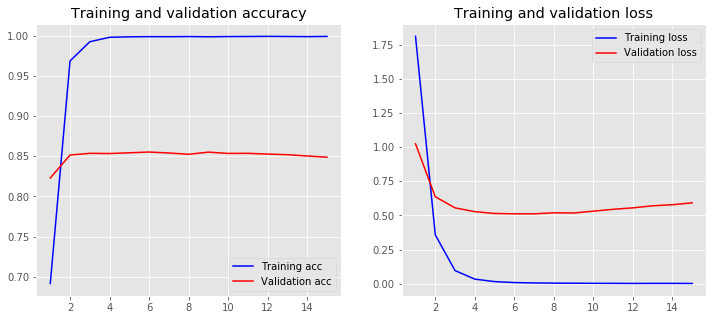

In [27]:
plot_history(history)

In [50]:
kmodel2=Sequential()
kmodel2.add(layers.Dense(50,input_dim=len(tfidf.vocabulary_.keys()),activation='relu'))
kmodel2.add(layers.Dense(20,activation='softmax'))

In [51]:
# Lowering the learning rate, the value is unusually low.

optimizer = keras.optimizers.Adam(lr=0.0001)
kmodel2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
kmodel2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                6505400   
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1020      
Total params: 6,506,420
Trainable params: 6,506,420
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = kmodel2.fit(x_train, dummy_train_y,
...                     epochs=3,
...                     verbose=False,
...                     validation_data=(x_test, dummy_test_y),
...                     batch_size=10)

In [53]:
#11:59
loss, accuracy = kmodel2.evaluate(x_train, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel2.evaluate(x_test, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9174
Testing Accuracy:  0.7631


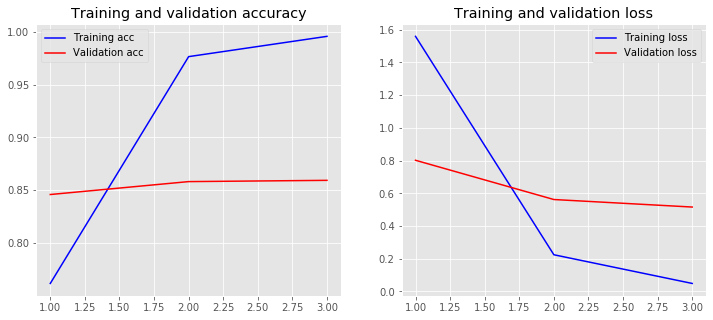

In [48]:
plot_history(history)

### Word Embeddings

In [63]:
sentences=['I can’t have a run as I just had a burger','I can have a burger as I just had a run']
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'can': 2, 'have': 4, 'run': 6, 'as': 0, 'just': 5, 'had': 3, 'burger': 1}

In [64]:
vectorizer.transform(sentences).toarray()

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

<b><item>One hot encoding will not be appropriate.<br>
<b><item>Rather, tokenize -> pad -> embedding


In [68]:
from keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(num_words=5000) #num_words set a upper limit for the corpus, i.e Most frequent 5000 tokens. 
tokenizer.fit_on_texts(master_train.data)

In [88]:
x_train_embd = tokenizer.texts_to_sequences(master_train.data)
x_test_embd = tokenizer.texts_to_sequences(master_test.data)

In [89]:
vocab_size = len(tokenizer.word_index) + 1

print(master_train.data[0])
print(x_train_embd[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





[14, 4308, 1350, 15, 38, 250, 29, 42, 298, 9, 17, 95, 78, 91, 4308, 1350, 15, 34, 77, 3, 2952, 610, 1767, 32, 211, 8, 26, 1308, 27, 171, 66, 47, 123, 63, 16, 17, 298, 8, 708, 1, 86, 263, 11, 26, 4, 36, 1497, 2266, 298, 1162, 2, 18, 14, 1, 1347, 843, 11, 26, 337, 4, 1, 4017, 80,

In [90]:
#padding

from keras.preprocessing.sequence import pad_sequences
maxlen = 200
x_train_embd = pad_sequences(x_train_embd, padding='post', maxlen=maxlen)
x_test_embd = pad_sequences(x_test_embd, padding='post', maxlen=maxlen)
print(x_train_embd[0, :])

[  14 4308 1350   15   38  250   29   42  298    9   17   95   78   91
 4308 1350   15   34   77    3 2952  610 1767   32  211    8   26 1308
   27  171   66   47  123   63   16   17  298    8  708    1   86  263
   11   26    4   36 1497 2266  298 1162    2   18   14    1 1347  843
   11   26  337    4    1 4017   80  182  484    7 1376    1  844   26
 1835   14    1  816    3    1  726   17    9   44    8   88   27  171
   39    4  828  273 1078 2908  198    3 2804  153   17  298    9  239
  628   25  808  357   13   21   16   17  384  298  181  112  188  206
 1498 1341    2   13   35   58    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [137]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

kmodel3 = Sequential()
kmodel3.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
kmodel3.add(layers.GlobalMaxPool1D())
kmodel3.add(layers.Dense(50, activation='relu'))
kmodel3.add(layers.Dense(20, activation='softmax'))
kmodel3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
kmodel3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 50)           6707150   
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_21 (Dense)             (None, 20)                1020      
Total params: 6,710,720
Trainable params: 6,710,720
Non-trainable params: 0
_________________________________________________________________


In [139]:
history = kmodel3.fit(x_train_embd, dummy_train_y,
...                     epochs=5,
...                     verbose=False,
...                     validation_data=(x_test_embd, dummy_test_y),
...                     batch_size=10)

In [140]:
loss, accuracy = kmodel3.evaluate(x_train_embd, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel3.evaluate(x_test_embd, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9436
Testing Accuracy:  0.6899


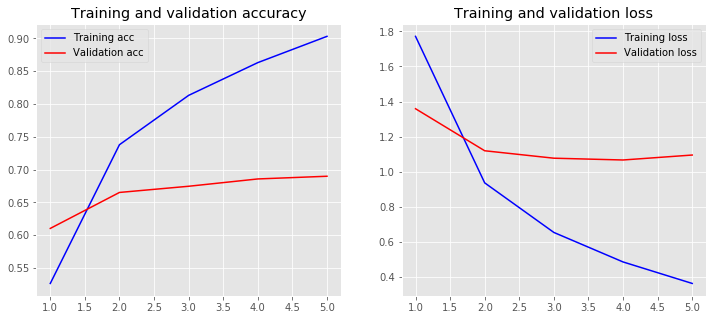

In [141]:
plot_history(history)

### Pre-trained word embeddings
using GloVE.6B.50d

In [143]:
import numpy as np
def create_embedding_martix(path, word_index, embd_dim):
    vocab_size=len(word_index)+1
    embd_mat=np.zeros((vocab_size,embd_dim))
    with open(path) as f:
        for line in f:
            word, *vect=line.split()
            if word in word_index:
                mkr=word_index[word]
                embd_mat[mkr]=np.array(vect,dtype=np.float32)[:embd_dim]
    f.close()
    return embd_mat

In [123]:
embd_dim=100
embedded_matrix=create_embedding_martix('./glove.6B.100d.txt',tokenizer.word_index,embd_dim)

In [124]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedded_matrix, axis=1))
nonzero_elements / vocab_size

0.42427856839343087

In [128]:
embedded_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [133]:
kmodel4 = Sequential()
kmodel4.add(layers.Embedding(vocab_size, embd_dim,
                           weights=[embedded_matrix], 
                           input_length=maxlen, 
                           trainable=True))
kmodel4.add(layers.GlobalMaxPool1D())
kmodel4.add(layers.Dense(50, activation='relu'))
kmodel4.add(layers.Dense(20, activation='softmax'))
kmodel4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
kmodel4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 100)          13414300  
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 20)                1020      
Total params: 13,420,370
Trainable params: 13,420,370
Non-trainable params: 0
_________________________________________________________________


In [134]:
history = kmodel4.fit(x_train_embd, dummy_train_y,
...                     epochs=3,
...                     verbose=False,
...                     validation_data=(x_test_embd, dummy_test_y),
...                     batch_size=10)

In [135]:
#11:35
loss, accuracy = kmodel4.evaluate(x_train_embd, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel4.evaluate(x_test_embd, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7508
Testing Accuracy:  0.6312


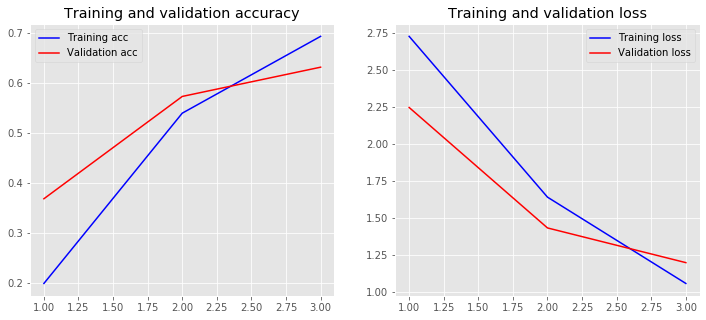

In [136]:
plot_history(history)

In [148]:
from numpy import asarray
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [152]:
from keras.layers import Embedding
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(layers.Flatten())
model.add(layers.Dense(20, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
history = kmodel4.fit(x_train_embd, dummy_train_y, epochs=3, verbose=False, validation_data=(x_test_embd, dummy_test_y), batch_size=10)

# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 4, 100)            13414300  
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                8020      
Total params: 13,422,320
Trainable params: 8,020
Non-trainable params: 13,414,300
_________________________________________________________________
None


NameError: name 'padded_docs' is not defined